In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# grid search persistence models for airline passengers
from math import sqrt
from numpy import mean
from sklearn.metrics import mean_squared_error

In [2]:
series = pd.read_csv('D:/dataset/monthly-airline-passengers.csv',header=0,sep=',',index_col=0)
print(series.shape)

(144, 1)


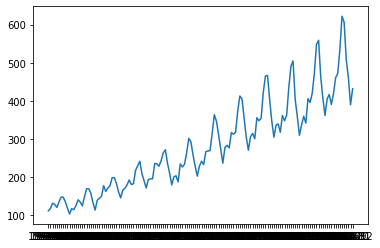

In [3]:
"""Docstring:
Line chart of monthly flights of international airlines
"""
plt.plot(series); 

train_test_split () The following function is divided into series considering raw observations and the number of observations to use in the test set as an argument.

In [4]:
"""Docstring:
plit a univariate dataset into train/test sets
"""
def train_test_split(data,n_test):
    return data[:-n_test],data[-n_test:]

series_to_supervised () The following function implements this behavior, allowing you to specify the number of delay observations to use at the input and the number to use at the output for each instance. It also deletes rows that contain NaN values because they can not be used to train or test a model.

In [5]:
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values

Validate walking forward
=
We define a model_fit () function to perform this operation, which can be populated for a specific type of neural network that we may be interested in later. The function takes the training data set and model configuration and returns the appropriate model ready for prediction.

In [6]:
#fit a model
def model_fit(train, config):
    return None

Each time step of the experimental data set is counted. A prediction is made using the fitting model.

Again, we define a general function called model_predict () that takes the appropriate model, model history, and configuration, and performs a one-step prediction.

In [7]:
#for cast with a pre_fit model
def model_predict(model,history,config):
    return 0.0

RMSE is calculated as the square root of the difference between the forecast and the actual values. measure_rmse () Implement the following using mean_squared_error () scikit Learn the function to calculate the first mean square error, or MSE, before calculating the square root.

In [8]:
#root mean squared error rms
def measure_rms(actual,predicted):
    return sqrt (mean_squared_error(actual,predicted))

The complete walk_forward_validation () function that links all of these is listed below.

The data set takes the number of observations to be used as the experimental set and the model configuration, and returns the RMSE for the performance of the model in the experimental set.

In [9]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# fit model
	model = model_fit(train, cfg)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = model_predict(model, history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	print(' > %.3f' % error)
	return error     

This is not always possible for large neural networks and may only make sense for small networks that can fit in minutes or hours.

repeat_evaluate () implements the following function and allows the number of iterations to be specified as an optional parameter that returns a default of 10 and an average RMSE score of all iterations.

In [10]:
# score a model, return None on failure
def reapt_evalute(data, config, test, n_reapt =10):
    #convert confog to a key
    key = str(config)
    #fit and evalute the model  n times
    scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
    #summarize score
    result = mean(scores)
    print('> Moodel[%s] %.3f'%(key,result))

Once the average score for each configuration is calculated, the list of configurations is sorted in ascending order so that the best scores are listed first.

Full performance is listed below.

In [11]:
#grid search configs
def grid_serch(data, cfg_list, n_test):
    # evaluate configs
    scores = [score_model(data_n_test, cfg)for  cfg in cfg_list]
    # sort configs by error, asc
    scores.sort(key=lambda tup:tup[1])
    return scores
    

Worked sample
=

Now that we have defined the test inhibition elements, we can tie them all together and define a simple stability model.

We do not need to fit a model, so the model_fit () function is implemented to simply return None

In [12]:
#fit model
def model_fit(train,config):
    return None

Configure to define a list of index displacements in observations
We will use the previous one compared to the predicted time that is used as the forecast. For example, 12 uses the observation 12 months earlier (-12) than the forecast time.

In [13]:
#define config
cfg_list = [1, 6, 12, 24, 36]

The function can be run to use these settings to continue the value in relative negative.model_predict ()

In [14]:
#for ecast with a pre-fit model 
def model_predict(model, history, offset):
    history[-offset]

(144, 1)


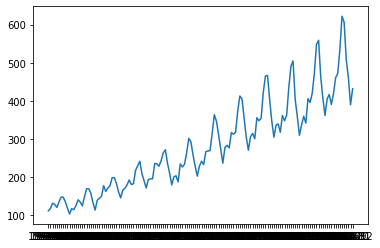

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# grid search persistence models for airline passengers
from math import sqrt
from numpy import mean
from sklearn.metrics import mean_squared_error
#=============================Data preparation=========================
series = pd.read_csv('D:/dataset/monthly-airline-passengers.csv',header=0,sep=',',index_col=0)
print(series.shape)

"""Docstring:
Line chart of monthly flights of international airlines
"""
plt.plot(series); 

#train_test_split () The following function is divided
#into series considering raw observations and the number of
#observations to use in the test set as an argument.
##==============================================================
"""Docstring:
plit a univariate dataset into train/test sets
"""
def train_test_split(data,n_test):
    return data[:-n_test],data[-n_test:]

#series_to_supervised () The following function implements this
#behavior, allowing you to specify the number of delay observat
#ions to use at the input and the number to use at the output
#for each instance. It also deletes rows that contain NaN
#values because they can not be used to train or test a model.
#============================================================
# transform list into supervised learning format
def series_to_supervised(data, n_in=1, n_out=1):
	df = DataFrame(data)
	cols = list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
	# put it all together
	agg = concat(cols, axis=1)
	# drop rows with NaN values
	agg.dropna(inplace=True)
	return agg.values
#===============================================================

# fit a model
def model_fit(train, config):
	return None

#We define a model_fit () function to perform this operation,
#which can be populated for a specific type of neural network
#that we may be interested in later. The function takes the
#training data set and model configuration and returns the
#appropriate model ready for prediction.
#=================================================================
#Each time step of the experimental data set is counted.
#A prediction is made using the fitting model.

#Again, we define a general function called model_predict ()
#that takes the appropriate model, model history, and
#configuration,
#and performs a one-step prediction.
#=================================================================
#for cast with a pre_fit model
def model_predict(model,history,config):
    return 0.0


#root mean squared error rms
def measure_rms(actual,predicted):
    return sqrt (mean_squared_error(actual,predicted))
#=============================================================
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# fit model
	model = model_fit(train, cfg)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = model_predict(model, history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	print(' > %.3f' % error)
	return error
#================================================================
# score a model, return None on failure
def reapt_evalute(data, config, test, n_reapt =10):
    #convert confog to a key
    key = str(config)
    #fit and evalute the model  n times
    scores = [walk_forward_validation(data, n_test, config) for _ in range(n_repeats)]
    #summarize score
    result = mean(scores)
    print('> Moodel[%s] %.3f'%(key,result))
#======================================================================================
#grid search configs
def grid_serch(data, cfg_list, n_test):
    # evaluate configs
    scores = [score_model(data_n_test, cfg)for  cfg in cfg_list]
    # sort configs by error, asc
    scores.sort(key=lambda tup:tup[1])
    return scores
#================================================================================
#fit model
def model_fit(train,config):
    return None
#============================================================
#define config
cfg_list = [1, 6, 12, 24, 36]
#===========================================================
#for ecast with a pre-fit model 
def model_predict(model, history, offset):
    history[-offset]

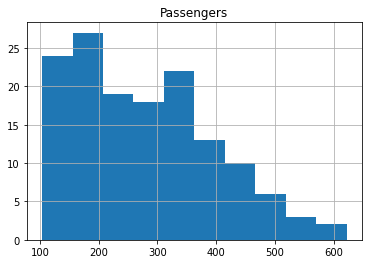

In [16]:
series.hist();

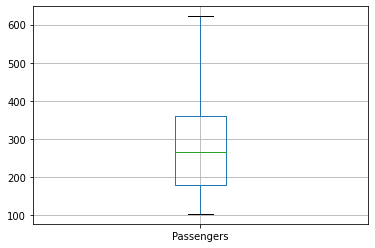

In [17]:
series.boxplot();